In [ ]:
#original code
'''import numpy as np
#from scipy.fft import fft, fftfreq, fftshift
from numpy.fft import fft, fftfreq, fftshift
import matplotlib.pyplot as plt

signaltime = 10       # time that signals run for
sr = 1000             # sample rate (per second)
sp = 1/sr             # sample interval
sn = signaltime *sr   # number of samples
t = np.linspace(0,signaltime, sn)       # time array

def signal(f1,f2,f3, noise=False):
  signals = ([f1,1],[f2,1], [f3,1])   # signals generated (based on mode frequencies)
  sig = np.zeros(len(t))            # 0 array for signals

  if noise==False:
    for i in signals:     # effectively sampling the signals at desired sample rate and superposing over each other
      sig += i[1] * np.sin(2 * np.pi * i[0] * t) # + np.random.rand(t.size))

  if noise==True:
    for i in signals:     # with noise
      sig += i[1] * np.sin(2 * np.pi * i[0] * t + np.random.rand(t.size))
  return sig

f1 = 3.3
f2 = 9
f3 = 13.3
signal = signal(f1,f2,f3, noise=True)

uw = (1/100)*100   #percentage of total time for window
lw = (1/100)*0

windowupper = int(uw*signaltime*sr)     # upper window limit (in time)
windowlower = int(lw*signaltime*sr)     # lower window limit (in time)
windowwidth = windowupper - windowlower     # window width (in time), and also number of samples within window

sampledsignal = signal[windowlower:windowupper]     # sampled signal only in windowed time space
wf1 = np.hamming(windowwidth)           # creating hamming window function
ws1 = sampledsignal*wf1                 # applying hamming window to reduced sampled signal
wf2 = np.bartlett(windowwidth)          # creating bartlett window
ws2 = sampledsignal * wf2               # applying bartlett window to reduced sampled signal
wf3 = np.blackman(windowwidth)
ws3 = sampledsignal *wf3       # creating and applying blackman window to reduced sampled signal
wf4 = np.hanning(windowwidth)
ws4 = sampledsignal *wf4
wf5 = np.kaiser(windowwidth,14)
ws5 = sampledsignal *wf5

repeats = -(sn // -windowwidth) +1

repeatedsampledsignal = np.tile(sampledsignal,repeats)[windowwidth-windowlower%windowwidth:(windowwidth-windowlower%windowwidth)+sn]
rws1 = np.tile(ws1,repeats)[windowwidth-windowlower%windowwidth:(windowwidth-windowlower%windowwidth)+sn] #repeated hamming window signal
rws2 = np.tile(ws2,repeats)[windowwidth-windowlower%windowwidth:(windowwidth-windowlower%windowwidth)+sn] #repeated bartlett window signal
rws3 = np.tile(ws3,repeats)[windowwidth-windowlower%windowwidth:(windowwidth-windowlower%windowwidth)+sn] #repeated blackman window signal
rws4 = np.tile(ws4,repeats)[windowwidth-windowlower%windowwidth:(windowwidth-windowlower%windowwidth)+sn] #repeated hanning window signal
rws5 = np.tile(ws5,repeats)[windowwidth-windowlower%windowwidth:(windowwidth-windowlower%windowwidth)+sn] #repeated kaiser window signal

x = fftfreq(sn, sp)[:sn//2]
y = fft(signal)[:sn//2]
#y2 = fft(repeatedsampledsignal)[:sn//2]
xf = fftfreq(windowwidth, sp)[:windowwidth//2]  # frequency array
yf = fft(sampledsignal)[:windowwidth//2]        # FFT of sampled signal
yfw1 = fft(ws1)[:windowwidth//2]    # FFT of sampled signal with hamming window
yfw2 = fft(ws2)[:windowwidth//2]    # FFT of sampled signal with bartlett window
yfw3 = fft(ws3)[:windowwidth//2]    # FFT of sampled signal with blackman window
yfw4 = fft(ws4)[:windowwidth//2]    # FFT of sampled signal with hanning window
yfw5 = fft(ws5)[:windowwidth//2]    # FFT of sampled signal with kaiser window

yrws1 = fft(rws1)[:sn//2]           # FFTs of repeated samples
yrws2 = fft(rws2)[:sn//2]
yrws3 = fft(rws3)[:sn//2]
yrws4 = fft(rws4)[:sn//2]
yrws5 = fft(rws5)[:sn//2]

yw1 = fft(wf1)[:windowwidth//2]     # FFTs of purely the window
yw2 = fft(wf2)[:windowwidth//2]
yw3 = fft(wf3)[:windowwidth//2]
yw4 = fft(wf4)[:windowwidth//2]
yw5 = fft(wf5)[:windowwidth//2]'''

In [2]:
import numpy as np
from numpy.fft import fft, fftfreq
import matplotlib.pyplot as plt

signaltime = 10       # time that signals run for
sr = 1000             # sample rate (per second)
sp = 1/sr             # sample interval
sn = signaltime *sr   # number of samples
t = np.linspace(0,signaltime, sn)       # time array

def signal(f1,f2,f3, noise=False):
  signals = ([f1,1],[f2,1], [f3,1])   # signals generated (based on mode frequencies)
  sig = np.zeros(len(t))            # 0 array for signals

  if noise==False:
    for i in signals:     # effectively sampling the signals at desired sample rate and superposing over each other
      sig += i[1] * np.sin(2 * np.pi * i[0] * t) # + np.random.rand(t.size))

  if noise==True:
    for i in signals:     # with noise
      sig += i[1] * np.sin(2 * np.pi * i[0] * t + np.random.rand(t.size))
  return sig

f1 = 3.3
f2 = 9
f3 = 13.3
signal = signal(f1,f2,f3, noise=True)

uw = (1/100)*100   #percentage of total time for window
lw = (1/100)*0

windowupper = int(uw*signaltime*sr)     # upper window limit (in time)
windowlower = int(lw*signaltime*sr)     # lower window limit (in time)
windowwidth = windowupper - windowlower     # window width (in time), and also number of samples within window

sampledsignal = signal[windowlower:windowupper]     # sampled signal only in windowed time space
wf1 = np.hamming(windowwidth)           # creating hamming window function
ws1 = sampledsignal*wf1                 # applying hamming window to reduced sampled signal
wf2 = np.bartlett(windowwidth)          # creating bartlett window
ws2 = sampledsignal * wf2               # applying bartlett window to reduced sampled signal
wf3 = np.blackman(windowwidth)
ws3 = sampledsignal *wf3       # creating and applying blackman window to reduced sampled signal
wf4 = np.hanning(windowwidth)
ws4 = sampledsignal *wf4
wf5 = np.kaiser(windowwidth,14)
ws5 = sampledsignal *wf5

repeats = -(sn // -windowwidth) +1
repeatedsampledsignal = np.tile(sampledsignal,repeats)[windowwidth-windowlower%windowwidth:(windowwidth-windowlower%windowwidth)+sn]

x = fftfreq(sn, sp)[:sn//2]
y = fft(signal)[:sn//2]
xf = fftfreq(windowwidth, sp)[:windowwidth//2]  # frequency array
yf = fft(sampledsignal)[:windowwidth//2]        # FFT of sampled signal
yfw1 = fft(ws1)[:windowwidth//2]    # FFT of sampled signal with hamming window
yfw2 = fft(ws2)[:windowwidth//2]    # FFT of sampled signal with bartlett window
yfw3 = fft(ws3)[:windowwidth//2]    # FFT of sampled signal with blackman window
yfw4 = fft(ws4)[:windowwidth//2]    # FFT of sampled signal with hanning window
yfw5 = fft(ws5)[:windowwidth//2]    # FFT of sampled signal with kaiser window

yw1 = fft(wf1)[:windowwidth//2]     # FFTs of purely the window
yw2 = fft(wf2)[:windowwidth//2]
yw3 = fft(wf3)[:windowwidth//2]
yw4 = fft(wf4)[:windowwidth//2]
yw5 = fft(wf5)[:windowwidth//2]

In [6]:
# Signal plot

#original signal
'''plt.plot(t, signal, label = "original signal")

plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('signal time plot')

plt.legend()
plt.grid()
plt.show()

#sampled signal
t2 = t[windowlower:windowupper]

plt.plot(t2, sampledsignal, label = "sampled signal")

plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('sampled signal in window')

plt.legend()
plt.grid()
plt.show()


#repeated sample
plt.plot(t, repeatedsampledsignal, label = "sampled signal")

plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('sampled signal time plot')

plt.legend()
plt.grid()
plt.show()


#repeated sample zoomed
rSS2 = repeatedsampledsignal[0:1000]

plt.plot(t3, rSS2, label = "sampled signal")

plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('sampled signal time plot')

plt.legend()
plt.grid()
plt.show()'''


'plt.plot(t, signal, label = "original signal")\n\nplt.xlabel(\'time\')\nplt.ylabel(\'Amplitude\')\nplt.title(\'signal time plot\')\n\nplt.legend()\nplt.grid()\nplt.show()\n\n#sampled signal\nt2 = t[windowlower:windowupper]\n\nplt.plot(t2, sampledsignal, label = "sampled signal")\n\nplt.xlabel(\'time\')\nplt.ylabel(\'Amplitude\')\nplt.title(\'sampled signal in window\')\n\nplt.legend()\nplt.grid()\nplt.show()\n\n\n#repeated sample\nplt.plot(t, repeatedsampledsignal, label = "sampled signal")\n\nplt.xlabel(\'time\')\nplt.ylabel(\'Amplitude\')\nplt.title(\'sampled signal time plot\')\n\nplt.legend()\nplt.grid()\nplt.show()\n\n\n#repeated sample zoomed\nrSS2 = repeatedsampledsignal[0:1000]\n\nplt.plot(t3, rSS2, label = "sampled signal")\n\nplt.xlabel(\'time\')\nplt.ylabel(\'Amplitude\')\nplt.title(\'sampled signal time plot\')\n\nplt.legend()\nplt.grid()\nplt.show()'

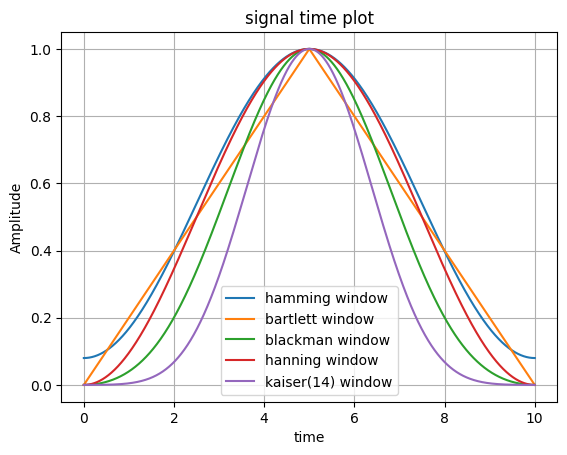

In [4]:
#for PP time

t2 = t[windowlower:windowupper]
t3 = t[0:sr] # 0 to 1s
signal_shortened = signal[0:sr]
repeatedsampledsignal_shortened = repeatedsampledsignal[0:sr]

#plt.plot(t3, signal_shortened, label = "original signal")
#plt.plot(t, signal, label = "original signal")
#plt.plot(t3, repeatedsampledsignal_shortened, label = "sampled signal")
#plt.plot(t, repeatedsampledsignal, label = "sampled signal")
#plt.axvline(x = 0.45, color = 'orange', linestyle='dashed' )
#plt.axvline(x = 0.95, color = 'orange', linestyle='dashed' )
#plt.plot(t2, ws2, label = "bartlett window")
#plt.plot(t2, 3*wf2, label = "window")

plt.plot(t2, wf1, label = "hamming window")
plt.plot(t2, wf2, label = "bartlett window")
plt.plot(t2, wf3, label = "blackman window")
plt.plot(t2, wf4, label = "hanning window")
plt.plot(t2, wf5, label = "kaiser(14) window")
#plt.plot(t2, 3*wf4, label = "signal")

#sine waves
#plt.plot(t3, np.sin(2 * np.pi * f1 * t3), label = '3.3Hz')
#plt.plot(t3, np.sin(2 * np.pi * f2 * t3), label = '9Hz')
#plt.plot(t3, np.sin(2 * np.pi * f3 * t3), label = '13.3Hz')




plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('signal time plot')

plt.legend()
plt.grid()
plt.show()

<ipython-input-352-a36cbf2a3543>:34: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.axis([x_min, x_max, y_min, y_max])


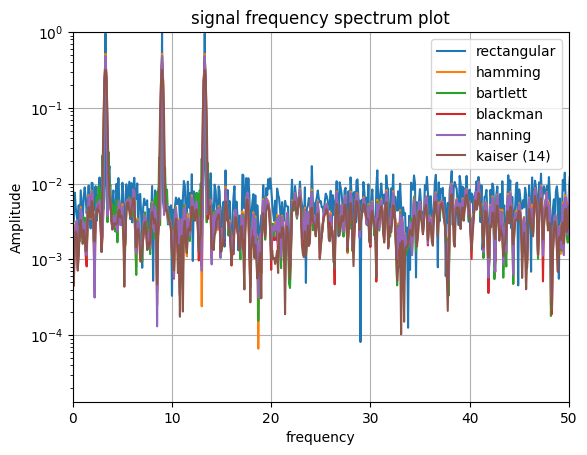

In [352]:
#for PP frequency
maxf = 50
N1 = sn
N = windowwidth


plt.semilogy(x[1:N1//2], 2.0/sn * np.abs(y[1:N1//2]), label = "rectangular")
#plt.semilogy(xf[1:N//2], 2.0/sn * np.abs(yf[1:N//2]), label = "rect window sampled signal FFT")

#plt.semilogy(x[1:N1//2], 2.0/sn * np.abs(yfw2[1:N1//2]), label = "bartlett window sampled signal FFT")
#plt.semilogy(xf[1:N//2], 2.0/sn * np.abs(yw2[1:N//2]), label = "window FFT")
plt.semilogy(xf[1:N//2], 2.0/sn * np.abs(yfw1[1:N//2]), label = "hamming")
plt.semilogy(xf[1:N//2], 2.0/sn * np.abs(yfw2[1:N//2]), label = "bartlett")
plt.semilogy(xf[1:N//2], 2.0/sn * np.abs(yfw3[1:N//2]), label = "blackman")
plt.semilogy(xf[1:N//2], 2.0/sn * np.abs(yfw4[1:N//2]), label = "hanning")
plt.semilogy(xf[1:N//2], 2.0/sn * np.abs(yfw5[1:N//2]), label = "kaiser (14)")


'''plt.axvline(f1, color = 'black', linestyle='dashed')
plt.axvline(f2, color = 'black', linestyle='dashed')
plt.axvline(f3, color = 'black', linestyle='dashed')'''

plt.xlabel('frequency')
plt.ylabel('Amplitude')
plt.title('signal frequency spectrum plot')


x_min = 0
x_max = maxf
y_min = 0
y_max = 1


plt.axis([x_min, x_max, y_min, y_max])
plt.legend()
plt.grid()
plt.show()


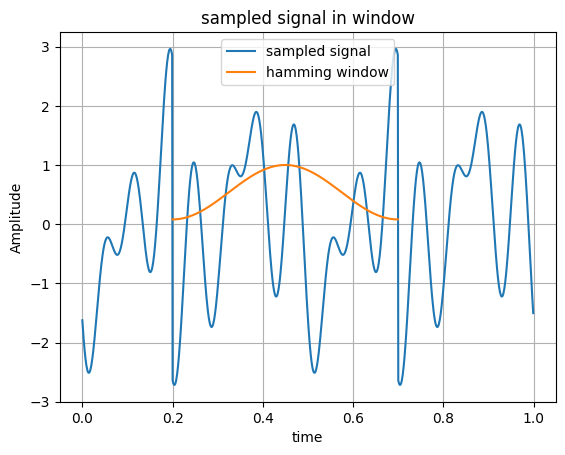

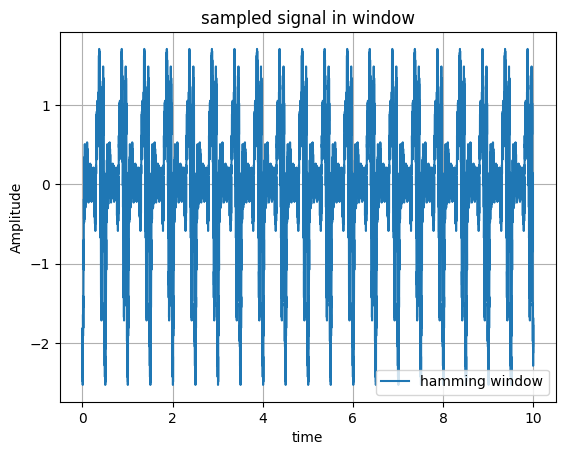

In [40]:
# plots for windows

#sampled signal
t2 = t[windowlower:windowupper]

plt.plot(t3, rSS2, label = "sampled signal")
plt.plot(t2, wf1, label = "hamming window")

plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('sampled signal in window')

plt.legend()
plt.grid()
plt.show()


plt.plot(t, repeatedwindowsignal, label = "hamming window")

plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('sampled signal in window')

plt.legend()
plt.grid()
plt.show()

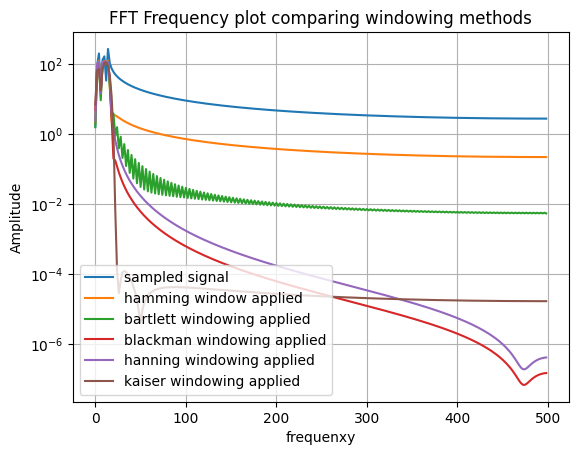

In [ ]:
# plots for frequency

plt.semilogy(xf, np.abs(yf), label = "sampled signal")
plt.semilogy(xf, np.abs(yfw1), label = "hamming window applied")
plt.semilogy(xf, np.abs(yfw2), label = "bartlett windowing applied")
plt.semilogy(xf, np.abs(yfw3), label = "blackman windowing applied")
plt.semilogy(xf, np.abs(yfw4), label = "hanning windowing applied")
plt.semilogy(xf, np.abs(yfw5), label = "kaiser windowing applied")

plt.xlabel('frequenxy')
plt.ylabel('Amplitude')
plt.title('FFT Frequency plot comparing windowing methods')

plt.legend()
plt.grid()
plt.show()